In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests
import glob
from matplotlib import pyplot as plt
import torch
from torchvision.transforms.functional import crop
import numpy as np
import sys
sys.path.append('..')
from paddleocr import draw_ocr, PaddleOCR
from ocr_ensemble import OCR
import cv2

In [3]:
ocr = OCR()

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


microsoft/trocr-small-handwritten


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


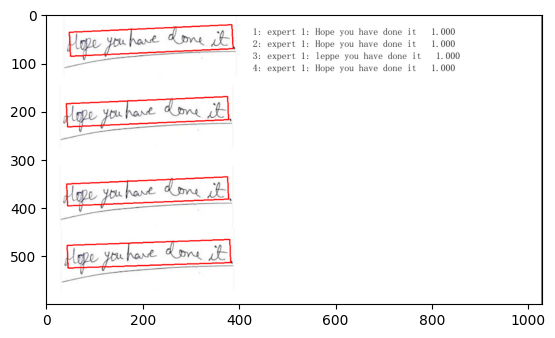

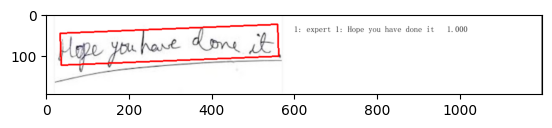

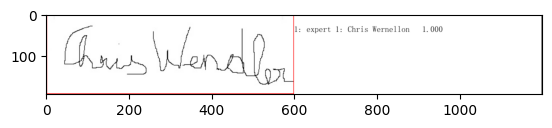

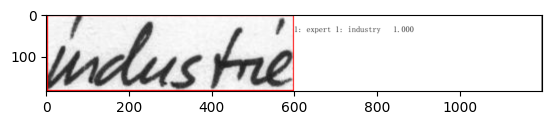

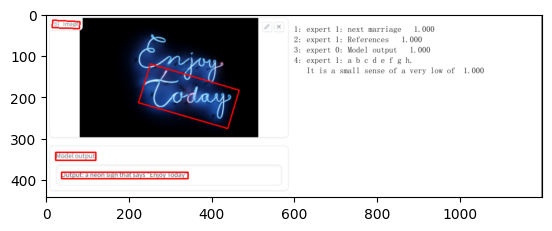

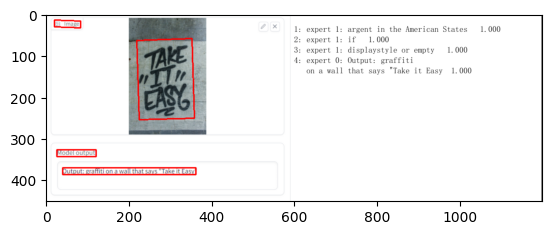

In [4]:
for fname in glob.glob('../data/handwritten/examples/*'):
    image = cv2.imread(fname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    bboxes, txts = ocr(image)
    im_show = draw_ocr(image, bboxes, txts, [1]*len(txts), font_path='../fonts/simfang.ttf')
    im_show = Image.fromarray(im_show)
    plt.imshow(im_show)
    plt.show()

[2023/04/21 15:12:28] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process


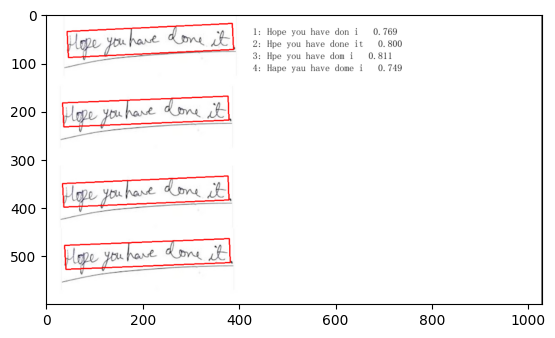

[2023/04/21 15:12:28] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process


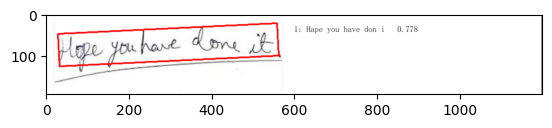

[2023/04/21 15:12:29] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process


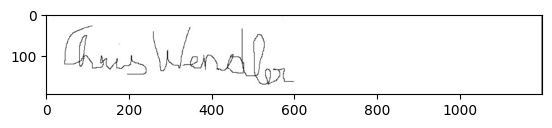

[2023/04/21 15:12:29] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process


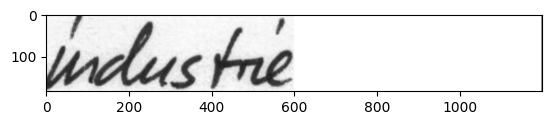

[2023/04/21 15:12:29] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process


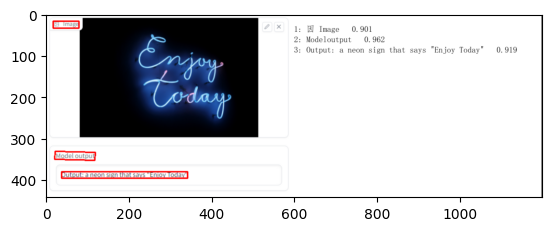

[2023/04/21 15:12:29] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process


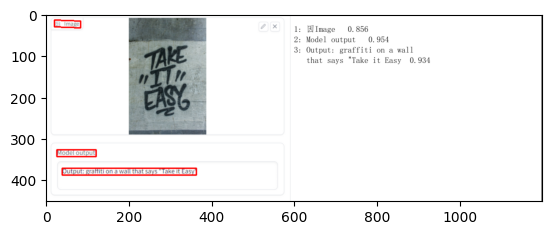

In [5]:
reader = PaddleOCR(use_gpu=True)
for fname in glob.glob('../data/handwritten/examples/*'):
    image = cv2.imread(fname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = reader.ocr(image)
    boxes = [line[0] for line in result[0]]
    txts = [line[1][0] for line in result[0]]
    scores = [line[1][1] for line in result[0]]
    im_show = draw_ocr(image, boxes, txts, scores, font_path='../fonts/simfang.ttf')
    im_show = Image.fromarray(im_show)
    plt.imshow(im_show)
    plt.show()